In [2]:
import pydicom 
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image 
import numpy as np
import matplotlib.image as mpimg

from scipy import ndimage
from skimage import morphology

In [3]:
path = "../input/inbreast-dataset/INbreast Release 1.0/AllDICOMs/"
single_img_path = "../input/inbreast-dataset/INbreast Release 1.0/AllDICOMs/20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"
target_path = "./IMAGES/"

In [4]:
medical_image = pydicom.read_file(single_img_path)

In [5]:
img = medical_image.pixel_array
print(img.shape)

(4084, 3328)


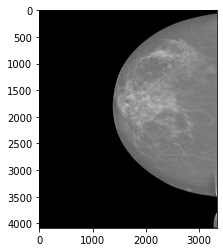

In [6]:
plt.imshow(img, cmap='gray')
plt.show()

In [7]:
image_dir= os.listdir(path)

In [8]:
len(image_dir)

412

In [9]:
errs = []

for img in image_dir:
    img_path = f'../input/inbreast-dataset/INbreast Release 1.0/AllDICOMs/{img}'
    img_id = img.split("_")[0]
    try:
        im = pydicom.dcmread(img_path)
    except:
        errs.append(img)
        continue
    im = im.pixel_array.astype(float)

    rescaled_image = (np.maximum(im,0)/im.max())*255 
    final_image = np.uint8(rescaled_image)

    final_image = Image.fromarray(final_image)
    # plt.imshow(final_image)
    if os.path.exists("./IMAGES/"):
        pass
    else:
        os.mkdir("./IMAGES")
        
    final_image.save(f"./IMAGES/{img_id}.jpg")

In [10]:
errs

['read_mixed_csv.m', 'inbreastBuilder.m']

In [11]:
import re
import pandas as pd
import shutil
import sys

In [12]:
df = pd.read_csv("../input/inbreast-dataset/INbreast Release 1.0/INbreast.csv",sep=";")
df.head()

,Patient ID,Patient age,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads
0,removed,removed,R,CC,201001,22678622,4,1
1,removed,removed,L,CC,201001,22678646,4,3
2,removed,removed,R,MLO,201001,22678670,4,1
3,removed,removed,L,MLO,201001,22678694,4,3
4,removed,removed,R,CC,201001,22614074,2,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient ID        410 non-null    object
 1   Patient age       410 non-null    object
 2   Laterality        410 non-null    object
 3   View              410 non-null    object
 4   Acquisition date  410 non-null    int64 
 5   File Name         410 non-null    int64 
 6   ACR               410 non-null    object
 7   Bi-Rads           410 non-null    object
dtypes: int64(2), object(6)
memory usage: 25.8+ KB


In [14]:
df["Bi-Rads"].value_counts()

2     220
1      67
5      49
3      23
4c     22
4a     13
6       8
4b      8
Name: Bi-Rads, dtype: int64

In [15]:
df["Bi-Rads"].unique()

array(['1', '3', '5', '2', '4a', '4c', '6', '4b'], dtype=object)

In [16]:
df["Bi-Rads"] = df["Bi-Rads"].str.replace(r'[^0-9]+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [17]:
df["Bi-Rads"].unique()

array(['1', '3', '5', '2', '4', '6'], dtype=object)

In [18]:
df["Bi-Rads"] = df["Bi-Rads"].astype(int)

In [19]:
result = []
for bi in df["Bi-Rads"]:
  if bi == 1:
    result.append("Normal")
  elif bi > 1 and bi < 3:
    result.append("Benign")
  else:
    result.append("Malignant")

df["Severity"] = result   

In [20]:
df.head()

,Patient ID,Patient age,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads,Severity
0,removed,removed,R,CC,201001,22678622,4,1,Normal
1,removed,removed,L,CC,201001,22678646,4,3,Malignant
2,removed,removed,R,MLO,201001,22678670,4,1,Normal
3,removed,removed,L,MLO,201001,22678694,4,3,Malignant
4,removed,removed,R,CC,201001,22614074,2,5,Malignant


In [21]:
df1 = df[["File Name", "Severity"]]
df1.head(3)

,File Name,Severity
0,22678622,Normal
1,22678646,Malignant
2,22678670,Normal


In [22]:
df1["File Name"] = df1["File Name"].astype("str")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
os.mkdir('IMAGE_CLASS')

In [24]:
labels = df1
dir = r"./IMAGES/"
target_dir = r"./IMAGE_CLASS/"

for filename, class_name in labels.values:

  if not os.path.exists(target_dir + str(class_name)):
    os.mkdir(target_dir + str(class_name))
  
  src_path = dir + "/" + filename + ".jpg"
  dst_path = target_dir + str(class_name) + "/" + filename + ".jpg"

  try:
    shutil.copy(src_path, dst_path)
  except IOError as e:
    print(f"Unable to copy file {src_path} to {dst_path}")
  except:
    print(f"When try to copy file {src_path} to {dst_pth}, unexpected error:{sys.exc_info()}")

In [25]:
b = os.listdir("./IMAGE_CLASS/Benign")
m = os.listdir("./IMAGE_CLASS/Malignant")
n = os.listdir("./IMAGE_CLASS/Normal")

print(f"Number of images in Benign: {len(b)}")
print(f"Number of images in Malignant: {len(m)}")
print(f"Number of images in Normal: {len(n)}")

Number of images in Benign: 220
Number of images in Malignant: 123
Number of images in Normal: 67


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import keras

import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [27]:
img_size = 256
batch_size = 2
channel = 3

In [28]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("./IMAGE_CLASS/",
                                                             shuffle= True,
                                                             seed = 12,
                                                             image_size=(img_size,img_size),
                                                             batch_size= batch_size)

Found 410 files belonging to 3 classes.


2022-07-16 16:56:12.317684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 16:56:12.461477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 16:56:12.462997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 16:56:12.470295: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [29]:
class_name = dataset.class_names
class_name

['Benign', 'Malignant', 'Normal']

In [30]:
print("Number of batches in a Dataset:", len(dataset))

# Taking 80% of data for training purpose
train_ds = dataset.take(round(len(dataset)* 0.8))

# Skipping 80% of training data and Taking remaining 20% of data for Validation and Test
val_n_test = dataset.skip(round(len(dataset)*0.8))

# Taking 10% of data from val_n_test for validation and another 10% for test data
val_ds = val_n_test.take(round(len(val_n_test)*0.5))
test_ds = val_n_test.skip(round(len(val_n_test)*0.5))

print("Train Dataset:",len(train_ds))
print()
print("Number of batches selected for test and validation:", len(val_n_test))
print("Validation Dataset:",len(val_ds))
print("Test Dataset:", len(test_ds))

Number of batches in a Dataset: 205
Train Dataset: 164

Number of batches selected for test and validation: 41
Validation Dataset: 20
Test Dataset: 21


In [31]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds  = val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size,img_size, channel)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        1

In [34]:
history = model.fit(train_ds,
          batch_size = batch_size,
          validation_data = val_ds,
          verbose=1,
          epochs=50,
)

Epoch 1/50


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '
2022-07-16 16:56:16.771619: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-16 16:56:16.923462: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 40774656 exceeds 10% of free system memory.
2022-07-16 16:56:16.923904: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25559040 exceeds 10% of free system memory.
2022-07-16 16:56:16.992609: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25559040 exceeds 10% of free system memory.
2022-07-16 16:56:16.994866: W tensorflow/core/framework/cpu_allocator_impl.cc:80] 

164/164 [==============================] - 27s 64ms/step - loss: 6.8768 - accuracy: 0.4024 - val_loss: 0.9648 - val_accuracy: 0.5750
Epoch 2/50
164/164 [==============================] - 1s 5ms/step - loss: 1.0286 - accuracy: 0.5457 - val_loss: 0.9411 - val_accuracy: 0.5750
Epoch 3/50
164/164 [==============================] - 1s 5ms/step - loss: 0.8288 - accuracy: 0.6524 - val_loss: 0.8999 - val_accuracy: 0.6000
Epoch 4/50
164/164 [==============================] - 1s 5ms/step - loss: 0.7121 - accuracy: 0.6951 - val_loss: 0.9386 - val_accuracy: 0.6250
Epoch 5/50
164/164 [==============================] - 1s 5ms/step - loss: 0.6709 - accuracy: 0.7317 - val_loss: 0.8976 - val_accuracy: 0.6000
Epoch 6/50
164/164 [==============================] - 1s 5ms/step - loss: 0.5241 - accuracy: 0.7866 - val_loss: 0.9627 - val_accuracy: 0.6250
Epoch 7/50
164/164 [==============================] - 1s 7ms/step - loss: 0.3697 - accuracy: 0.8384 - val_loss: 1.1420 - val_accuracy: 0.6000
Epoch 8/50
164/

In [47]:
scores = model.evaluate(test_ds)

21/21 [==============================] - 0s 5ms/step - loss: 3.3837 - accuracy: 0.6750


In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 164}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
loss = history.history["loss"]
acc = history.history["accuracy"]

val_loss = history.history["val_loss"]
val_acc = history.history["val_accuracy"]

In [ ]:
plt.plot(range(50), acc,'r', label="Accuracy")
plt.plot(range(50), val_acc,'b', label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.grid(True)
plt.savefig('Malignancy_MYModel_Acc.jpg', dpi=400)


plt.plot(range(50), loss,'r' ,label="Loss")
plt.plot(range(50), val_loss,'b', label="Validation_Loss")
plt.legend(loc="upper right")
plt.title("Loss and Validation Loss")
plt.grid(True)
plt.savefig('Malignancy_MYModel_loss.jpg', dpi=400)

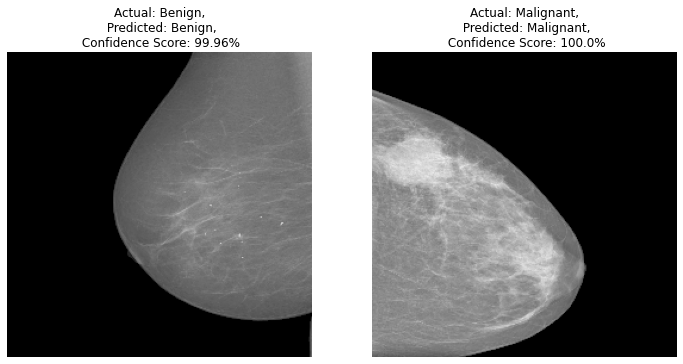

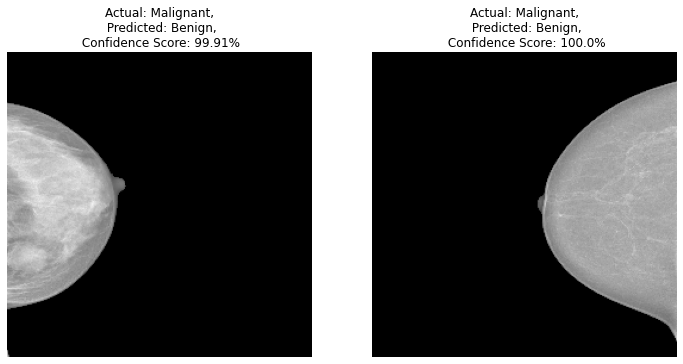

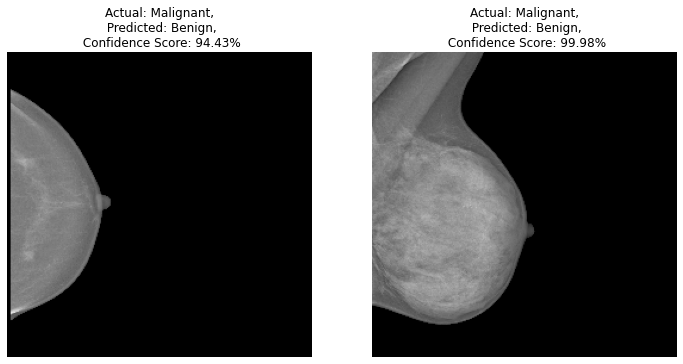

In [40]:
BATCH_SIZE = 2
for images, labels in val_ds.take(3):
    plt.figure(figsize=(12, 12))
    for i in range(BATCH_SIZE):
        ax = plt.subplot(1, 2, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        actual_cls = class_name[labels[i]]
        prediction = model.predict(images)
        predicted_cls = class_name[np.argmax(prediction[i])]
        confidence = round(100 * (np.max(prediction[i])), 2)
        plt.title(f"Actual: {actual_cls},\n Predicted: {predicted_cls},\n Confidence Score: {confidence}%")
        plt.axis("off")
    plt.show()